"""
If you don’t want a full database, use networkx for a lightweight graph.

NetworkX: Good for quick in-memory analysis in Python.
"""

In [1]:
import networkx as nx

In [2]:
# Sample data
users = [
{"id": 0, "name": "Hero"},
{"id": 1, "name": "Dunn"},
{"id": 2, "name": "Sue"},
{"id": 3, "name": "Chi"},
{"id": 4, "name": "Thor"},
{"id": 5, "name": "Clive"},
{"id": 6, "name": "Hicks"},
{"id": 7, "name": "Devin"},
{"id": 8, "name": "Kate"},
{"id": 9, "name": "Klein"}
]

friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [3]:
G = nx.Graph()

# add nodes
for user in users:
    G.add_node(user["id"], name=user["name"])

# add edges
for pair in friendship_pairs:
    G.add_edge(pair[0], pair[1])

In [4]:
#Query : friends of user 0
list(G.neighbors(0))

[1, 2]

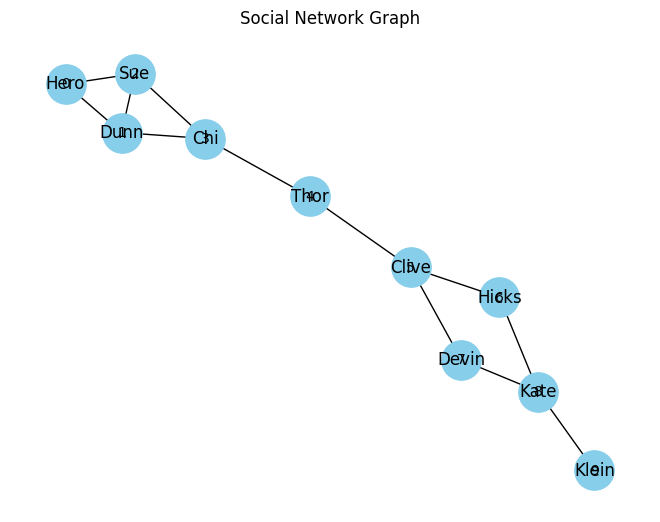

In [5]:
import matplotlib.pyplot as plt

# draw the graph
pos = nx.spring_layout(G, seed=42)  # layout algorithm
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=800, font_size=10)

# add labels
labels = {user["id"]: user["name"] for user in users}
nx.draw_networkx_labels(G, pos, labels)

plt.title("Social Network Graph")
plt.show()

In [6]:
# import networkx as nx

#degree centrality
degree_centrality = nx.degree_centrality(G)
print("Most connected users: ", sorted(degree_centrality.items(), key=lambda x: -x[1])[:3])


Most connected users:  [(1, 0.3333333333333333), (2, 0.3333333333333333), (3, 0.3333333333333333)]


In [7]:
# pip install python-louvain

In [8]:
#community detection (Louvain)
import community as community_louvain # pip install python-louvain
partition = community_louvain.best_partition(G)
print("Communities:" , partition)

Communities: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}


In [9]:
"""
Python-Louvain for Community Detection
Python-Louvain is a popular library for detecting communities in graphs using the Louvain method, 
a greedy optimization algorithm that maximizes modularity. This guide covers installation, 
basic usage, and practical examples.
"""
import community as community_louvain
print(community_louvain.__version__)

0.16


In [10]:
# Example: Create a random graph
G = nx.erdos_renyi_graph(50, 0.1)  # 100 nodes, 10% edge probability

# Or load a real-world dataset
# G = nx.read_edgelist("social_network.txt")

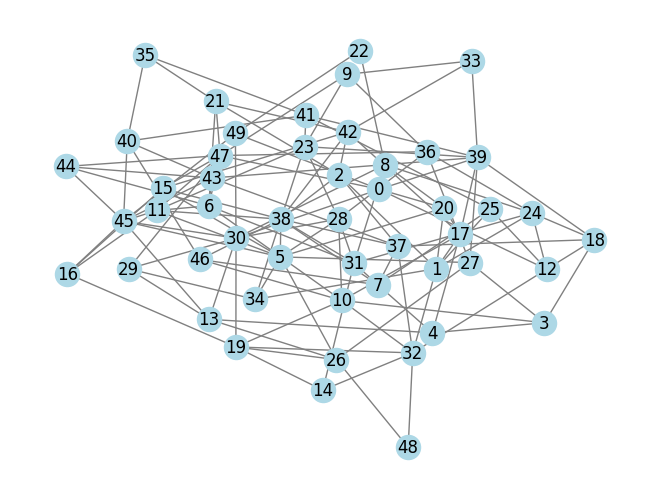

In [11]:
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()  # Requires matplotlib

In [12]:
"""
Detect Communities - Run Louvain Algorithm
"""
partition = community_louvain.best_partition(G)
print(partition)    # Returns {node1: community_id1, node2: community_id2, ...}

{0: 1, 1: 1, 2: 2, 3: 3, 4: 4, 5: 6, 6: 6, 7: 2, 8: 1, 9: 0, 10: 3, 11: 6, 12: 1, 13: 4, 14: 3, 15: 6, 16: 6, 17: 1, 18: 1, 19: 3, 20: 1, 21: 2, 22: 1, 23: 0, 24: 1, 25: 1, 26: 3, 27: 3, 28: 0, 29: 4, 30: 1, 31: 2, 32: 3, 33: 0, 34: 4, 35: 5, 36: 0, 37: 2, 38: 2, 39: 1, 40: 5, 41: 5, 42: 2, 43: 6, 44: 6, 45: 6, 46: 2, 47: 6, 48: 3, 49: 1}


In [13]:
"""
Get Modularity Score
Modularity measures the strength of community structure (higher = better clustering).
"""
modularity = community_louvain.modularity(partition, G)
print("Modularity: ", modularity)  # Typically between -0.5 and 1

Modularity:  0.3599033816425121


In [14]:
# Count Communities
num_communities = max(partition.values()) + 1
print("Number of communities: ", num_communities)

Number of communities:  7


C:\Users\jay_s\AppData\Local\Temp\ipykernel_27056\1252826667.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", max(partition.values()) + 1)


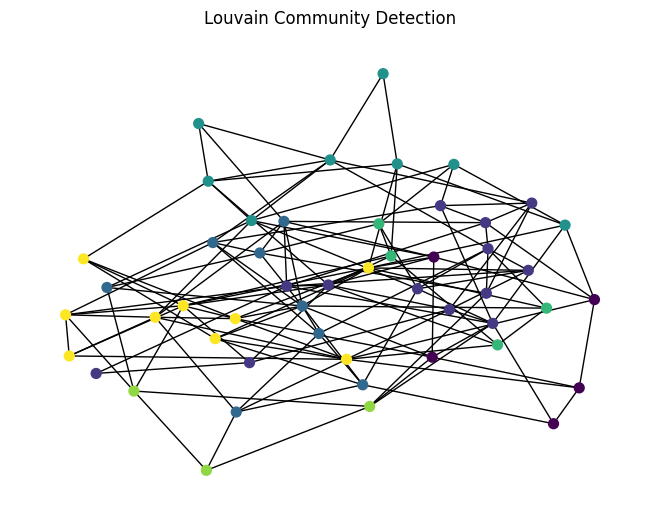

In [15]:
"""
Visualize Communities - Color Nodes by Community
"""
# assign colors based on communityID
cmap = plt.cm.get_cmap("viridis", max(partition.values()) + 1)
nx.draw_spring(
    G,
    node_color=[partition[i] for i in G.nodes()],
    cmap=cmap,
    with_labels=False,
    node_size=50,
)
plt.title("Louvain Community Detection")
plt.show()

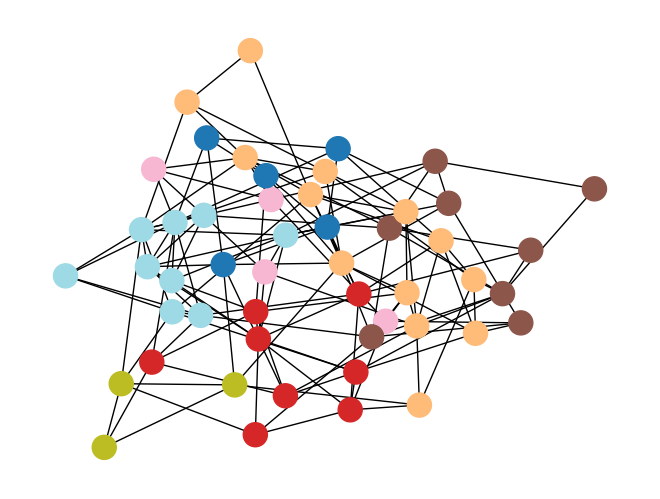

In [16]:
"""
Alternative Visualization (Grouped Layout)
"""
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=list(partition.values()) , cmap=plt.cm.tab20)
plt.show()

In [17]:
"""
Advanced Usage  - Resolution Parameter (γ)
Adjusts community size sensitivity (higher γ → smaller communities).
"""
partition = community_louvain.best_partition(G, resolution=1.5)   # default = 1.0

In [18]:
"""
Benchmarking & Comparing Partitions
"""
# from networkx.algorithms.community import modularity
from networkx.algorithms.community import label_propagation_communities, modularity

# --- Louvain Method ------
louvain_partition = community_louvain.best_partition(G)
louvain_communities = {}
for node, comm_id in louvain_partition.items():
    if comm_id not in louvain_communities:
        louvain_communities[comm_id] = set()
    louvain_communities[comm_id].add(node)

# ----- Label Propagation --------
label_prop_communities = list(label_propagation_communities(G))

# ----- Compare Modularity -------
louvain_mod = modularity(G, louvain_communities.values())
label_prop_mod = modularity(G, label_prop_communities)

print(f"Louvain Modularity: {louvain_mod:.4f}")
print(f"Label Propagation Modularity: {label_prop_mod: .4f}")


# compare two partitions
# partition2 = some_other_algorithm(G)
# mod1 = modularity(G, [set(n for n, c in partition.items() if c == i) for i in set(partition.values())])
# mod2 = modularity(G, [set(n for n, c in partition2.items() if c == i) for i in set(partition2.values())])
# print("Louvain modularity: ", mod1, "Other method: ", mod2)

Louvain Modularity: 0.3506
Label Propagation Modularity:  0.2232


In [19]:
"""
Alternative Comparison (Girvan-Newman) - If you prefer hierarchical clustering:
"""
from networkx.algorithms.community import girvan_newman

# Get the first level of Girvan-Newman partitioning
girvan_newman_communites = next(girvan_newman(G))
girvan_mod = modularity(G, girvan_newman_communites)

print(f"Girvan-Newman Modularity: {girvan_mod:.4f}")

Girvan-Newman Modularity: -0.0001


In [20]:
"""
Basic Graph Creation
Create an Empty Graph
"""
G = nx.Graph()              # Undirected graph
DG = nx.DiGraph()           # Directed graph
MG = nx.MultiGraph()        # Unidirected multigraph (multiple edges)
MDG = nx.MultiDiGraph()     # Directed multigraph

In [21]:
# Add nodes
G.add_node(1)     # single node
G.add_nodes_from([2, 3, 4])      # multiple nodes
G.add_node("A", weight=5)       # node with attributes

In [22]:
# add edges
G.add_edge(1, 2)  # single edge
G.add_edges_from([(1, 3), (2, 4)])   # multiple edges
G.add_edge("A", "B", weight=2.5)     # edge with attributes

In [23]:
# Graph Analysis - Basic properties
print("Nodes: ", G.nodes())

Nodes:  [1, 2, 3, 4, 'A', 'B']


In [24]:
print("Edges: ", G.edges())

Edges:  [(1, 2), (1, 3), (2, 4), ('A', 'B')]


In [25]:
print("Number of nodes: ", G.number_of_nodes())

Number of nodes:  6


In [26]:
print("Number of edges: ", G.number_of_edges())

Number of edges:  4


In [27]:
print("Degree of node 1: ", G.degree(1))  # Number of connections

Degree of node 1:  2


In [28]:
# Shortest Path
path = nx.shortest_path(G, source=1, target=4)
print("Shortest path from 1 to 4: ", path)

Shortest path from 1 to 4:  [1, 2, 4]


In [29]:
"""
Centrality Measures
"""
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

In [30]:
degree_centrality

{1: 0.4, 2: 0.4, 3: 0.2, 4: 0.2, 'A': 0.2, 'B': 0.2}

In [31]:
betweenness_centrality

{1: 0.2, 2: 0.2, 3: 0.0, 4: 0.0, 'A': 0.0, 'B': 0.0}

In [32]:
closeness_centrality

{1: 0.44999999999999996,
 2: 0.44999999999999996,
 3: 0.3,
 4: 0.3,
 'A': 0.2,
 'B': 0.2}

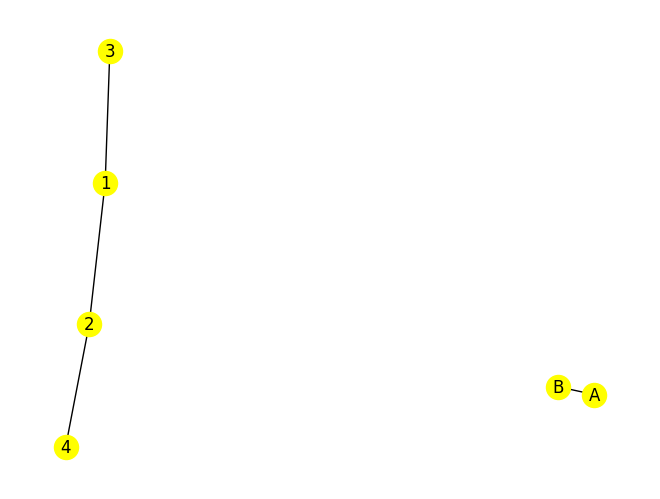

In [33]:
"""
Visualization - Draw a Simple Graph
"""
nx.draw(G, with_labels=True, node_color='yellow', edge_color='black')
plt.show()

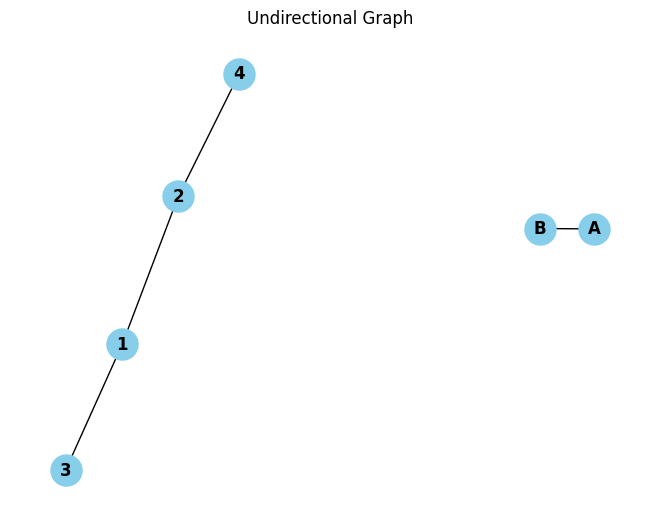

In [34]:
"""
Customized Plot
"""
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold')
plt.title("Undirectional Graph")
plt.show()


In [35]:
"""
Importing/Exporting Graphs - Save & Load (Adjacency List)
"""
nx.write_adjlist(G, "graph.adjlist")  # save
G = nx.read_adjlist("graph.adjlist")  # Load


In [36]:
"""
Export to Pandas (for DataFrames)
"""
import pandas as pd

df_edges = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

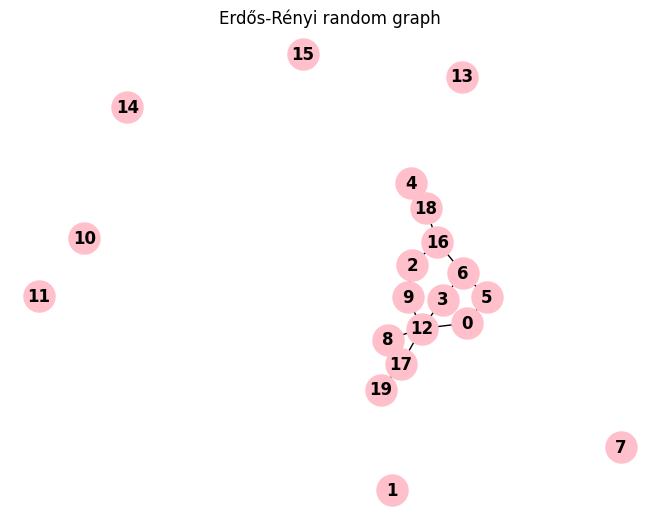

In [37]:
"""
Advanced: Random Graphs   - generate different graph everytime
- Erdős-Rényi random graph
- Barabási-Albert (scale-free) graph
"""
# Erdős-Rényi random graph
G_random = nx.erdos_renyi_graph(20, 0.1)   # 20 nodes, 10%  edge probability

pos = nx.spring_layout(G_random)
nx.draw(G_random, pos, with_labels=True, node_size=500, node_color='pink', font_weight='bold')
plt.title("Erdős-Rényi random graph")
plt.show()

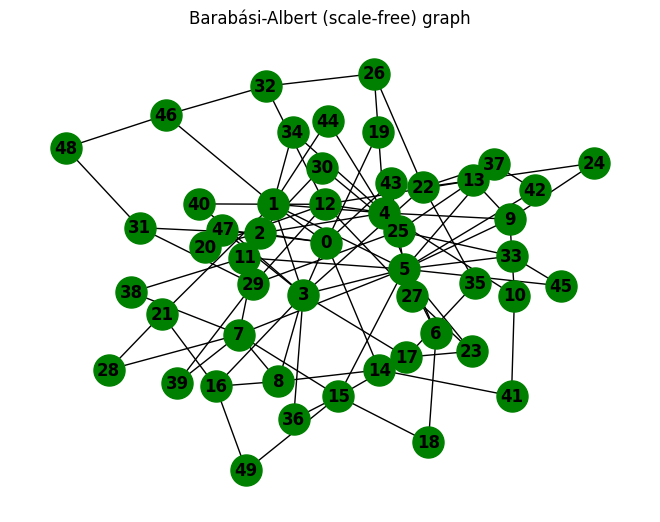

In [38]:
# Barabási-Albert (scale-free) graph
G_ba = nx.barabasi_albert_graph(50, 2)  # 50 nodes, 2 edges per new node

pos = nx.spring_layout(G_ba)
nx.draw(G_ba, pos, with_labels=True, node_size=500, node_color='green', font_weight='bold')
plt.title("Barabási-Albert (scale-free) graph")
plt.show()